# outline

1. open csv file in Excel, get the first impression and decide analysis strategy--focus on analyzing the relationship between survive and some variables I'm interested in

2. load and check data file

3. data wrangling

4. analyses of two questions I am most interested in: 
       A. are the survive rates different among social classes? Dose survive rate statistically correlated with social class?
       B. what is the distribution of age among people who survived and people who died? More interestingly,does age affects survive if I take gender into consideration?
   
5. briefly explore the relationship between survive and family size 



## data import

Import the libraries, load data and preform some description of the data table such as variables and data types.


In [2]:
## import the libraries 

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats.stats import pearsonr

In [3]:
##description of variables
data_description={'Survived':'Survived (1) or died (0)',
                  'Pclass':'Passenger’s class',
                  'Name':'Passenger’s name',
                  'Sex':'Passenger’s sex',
                 'Age':'Passenger’s age',
                 'SibSp':'Number of siblings/spouses aboard','Parch':'Number of parents/children aboard'
                 ,'Ticket':'Ticket number','Fare':'Fare','Cabin':'Cabin','Embarked':'Port of embarkation'}


pd.DataFrame(data_description.items(),columns=['variables', 'description'])

,variables,description
0,Name,Passenger’s name
1,Embarked,Port of embarkation
2,Age,Passenger’s age
3,Parch,Number of parents/children aboard
4,Pclass,Passenger’s class
5,SibSp,Number of siblings/spouses aboard
6,Cabin,Cabin
7,Fare,Fare
8,Sex,Passenger’s sex
9,Survived,Survived (1) or died (0)


In [4]:
##load data from csv

fulldf = pd.read_csv('titanic-data.csv', header=0)
fulldf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
##check the data type

fulldf.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## data wrangling

Check the quality/completeness of data table then drop uninterested variables, create a new dataframe for investigation.


In [6]:
##use df.info()function to briefly check the completeness of value in each column.

fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
##delete uninterested variables

full_variables = fulldf.drop(['Embarked','Name','Ticket','Cabin'], axis=1)
full_variables.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


to make my future analysis easier, I decided to regard SibSp and Parch as family members, merge those columns, creat a new column called family size


In [8]:
## instead of using manual list operations and for loops to organize data as in my first submission, 
## I'm using pandas groupby in my following analysis for the sake of code efficiency 


In [9]:
family_size=full_variables['SibSp']+full_variables['Parch']

In [10]:
## instead of using insert(), below is the standard way to add a column into dataframe

full_variables['familySize'] = family_size

In [11]:
##some general ideas of variables i'm interested in

full_variables[['Survived','Pclass','Sex','familySize','Fare']].describe() 


,Survived,Pclass,familySize,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.904602,32.204208
std,0.486592,0.836071,1.613459,49.693429
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,31.000000
max,1.000000,3.000000,10.000000,512.329200


# statistics and visulization

## social class



#### passenger distrubution by class

The descriptive plots below show that while 3rd class population is larger than the other two, most of them are perished. on the other hand, most survived passengers are among first class. This indicates passenger social class might be a statistically relavent.


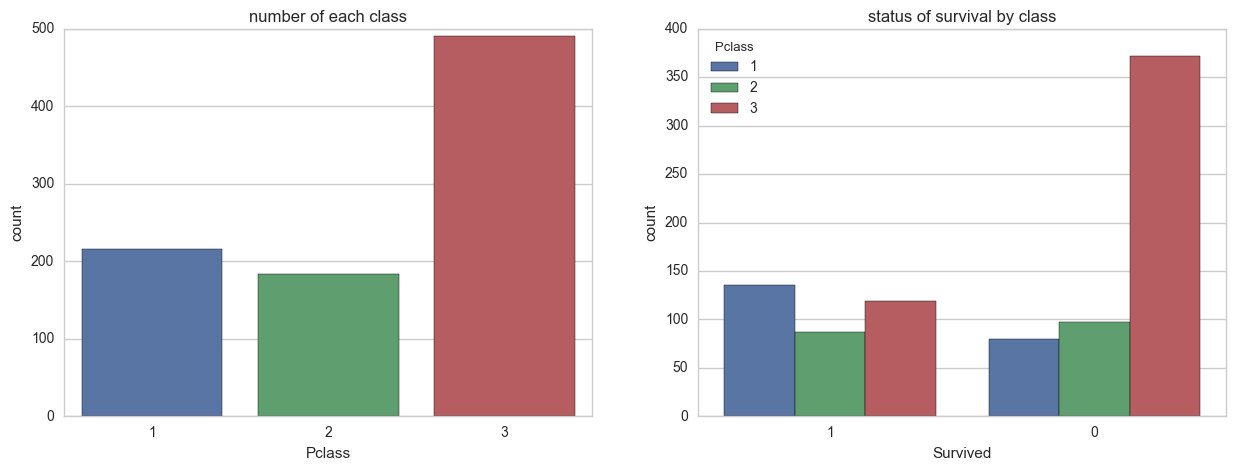

In [12]:

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

ax1=sns.countplot(x='Pclass', data=full_variables,ax=axis1)
ax1.title.set_text('number of each class')
#distribution of social class by survive
ax2=sns.countplot(x='Survived', hue="Pclass", data=full_variables, order=[1,0], ax=axis2)
ax2.title.set_text('status of survival by class')

#### statistic study of survive by class 
Based on Titanic story, lower class passengers tend to:
    1. live close to the ship bottom-sink first
    2. recive less attention from ship admin
    
So my hypothesis is that the lower social class passengers have less survive chance. 
An appropriate statistical test would be chi-square test because a contingency table can be made from counting of 'Pclass' and 'Survive'. 

Ho: The survive rate is independent of social class.
Ha: The survive rate is associated with social class.

set a=0.05, as shown in the following cells, chi2=102.888988757, p=4.5492517113e-23

p<a, deny Ho, accept Ha, The survive rate is associated with social class.


In [63]:
## to get chi2_contingency inputs, instead of manually define get_chi_obs(),use pivot_table() as suggested by reviewer


chi_subtable=full_variables[['Pclass','Survived','PassengerId']]
#pd.pivot_table(chi_subtable, index=['Survived','Pclass'], aggfunc='count')
chi_frame=pd.pivot_table(chi_subtable, index=['Survived','Pclass'], aggfunc='count')
ob1=list(chi_frame.ix[0]['PassengerId'])
ob2=list(chi_frame.ix[1]['PassengerId'])
P_obs=np.array([ob1,ob2])
print P_obs

[[ 80  97 372]
 [136  87 119]]


In [65]:
chi2, p, dof, expected = chi2_contingency(P_obs)


print  chi2, p



102.888988757 4.5492517113e-23


additionally, Pearson's r can be used to look at the statistical correlation of 'Pclass' and 'Survive'.

Ho: The survive rate is not correlated with social class.
Ha: The survive rate is correlated with social class.

set a=0.05, as shown in the following cells, r=-0.994024355227, p=0.0696312209206
p>a, accept Ho, The survive rate is not correlated with social class.

r=-0.994024355227 indicates a very strong negative correlation, however perhaps the statistical power is limited by sample size, the correlation is lack of statistical significance. 

In [15]:
##Pearson's r 

means = full_variables[['Pclass', "Survived"]].groupby(['Pclass'],as_index=False).mean()
x = means['Survived']
y = means['Pclass']

r_value,p_value= pearsonr(x, y)

print means
print r_value,p_value



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-0.994024355227 0.0696312209206


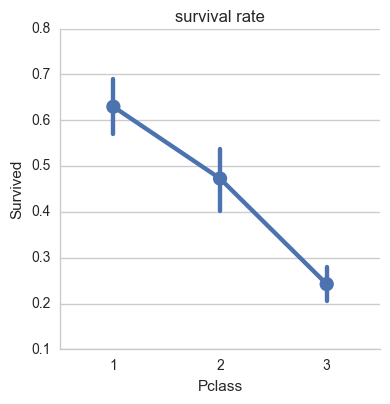

In [16]:
#visual plot
sns.factorplot('Pclass','Survived', data=full_variables,size=4,aspect=1)

sns.plt.title('survival rate')

## Gender and Age


firstly get an overal idea of survive count by gender using the same dataset 'full_variables'.

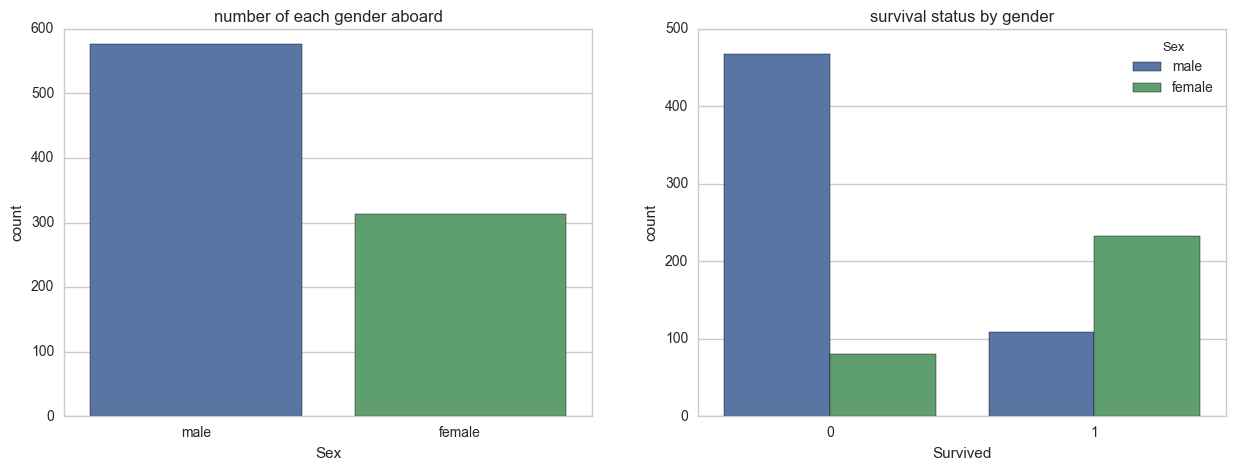

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

ax4=sns.countplot(x='Sex', data=full_variables,ax=axis1)
ax4.title.set_text('number of each gender aboard')
ax5=sns.countplot(x='Survived', hue="Sex", data=full_variables,ax=axis2)
ax5.title.set_text('survival status by gender')

Again use chi-square to test the dependency of 'Survive' on 'Sex':

Ho: The survive rate is independent of gender.
Ha: The survive rate is associated with gender.

set a=0.05, as shown in the following cell, chi2=260.717020167, p=1.19735706278e-58

p<a, deny Ho, accept Ha, The survive rate is associated with gender.



In [18]:

survival_group=full_variables.groupby('Survived')
survived_g=survival_group.get_group(1).groupby('Sex')
perished_g=survival_group.get_group(0).groupby('Sex')

list1=list(survived_g['Survived'].count())
list2=list(perished_g['Survived'].count())

G_obs=np.array([list1,list2])

print G_obs
chi2, p, dof, expected = chi2_contingency(G_obs)
print  chi2, p


[[233 109]
 [ 81 468]]
260.717020167 1.19735706278e-58


#### more data wrangling

Becuase there are quite a few missing values in 'Age',I decided to:
create a new dataset that dismissed the entries miss Age value for more indepth analysis.


In [19]:
##create new dataset without missing age value and check quality again
age_full_variables=full_variables[np.isfinite(full_variables['Age'])]
#check_data(age_full_variables)
age_full_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
familySize     714 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 55.8+ KB


In [20]:
##because for this part I need to group the data in more than one level, and pass through both full data set
##and tailored data set, so defined a function return the subgroups based on Survival and gender.


def sub_group(df):
    survival_group=df.groupby('Survived')
    survived=survival_group.get_group(1)
    perished=survival_group.get_group(0)
    female_survived=survived.groupby('Sex').get_group('female')
    male_survived=survived.groupby('Sex').get_group('male')
    female_perished=perished.groupby('Sex').get_group('female')
    male_perished=perished.groupby('Sex').get_group('male')
    female_total=df.groupby('Sex').get_group('female')
    male_total=df.groupby('Sex').get_group('male')
    return survived,perished,female_survived,male_survived,female_perished,male_perished,female_total,male_total





In [21]:
##get subsets

survived,perished,female_survived,male_survived,\
female_perished,male_perished,female_total,male_total=sub_group(age_full_variables)

#### statistic study of survive by age
as shown in below cell, mean age of survived passengers is 28.3436896552(std=14.9509519841),mean age of died passengers is 30.6261792453(std=14.1721098771)
use T-test to compare the age distribution between survived and perished populations, t=-2.0666869462538102,p=0.039
which indicates age distributions between survived and died passengers are significantly different, that maybe becuase of the save children first policy, the plot can also tell that.

28.3436896552
14.9509519841
29.6991176471
14.5264973323
30.6261792453
14.1721098771
Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)


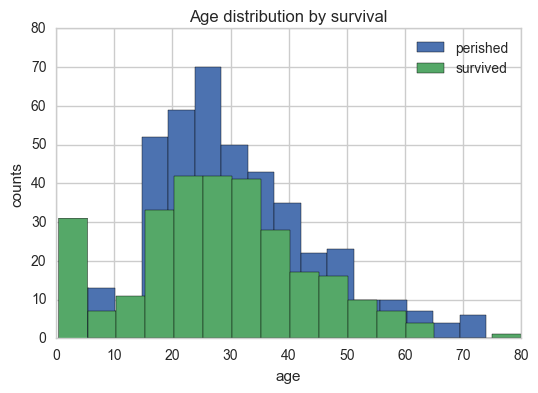

In [22]:
#survived,perished=sub_group(age_full_variables)

#survived=age_full_variables[age_full_variables['Survived'] == 1]
#perished=age_full_variables[age_full_variables['Survived'] == 0]

print survived['Age'].mean()
print survived['Age'].std()
print full_variables['Age'].mean()
print full_variables['Age'].std()
print perished['Age'].mean()
print perished['Age'].std()

print ttest_ind(survived['Age'], perished['Age']) 


plt.figure()  
plt.axis([0, 80, 0, 80])  
plt.hist(perished['Age'],bins=16, label='perished')
plt.hist(survived['Age'],bins=16, label='survived')

plt.title('Age distribution by survival')  
plt.xlabel('age')  
plt.ylabel('counts')  
plt.legend() 

#### data visualization of survive by age and gender

With the above analysis in mind, to answer my original questions I decided to generate a few subsets to look at age distribution of survived males/females compare to total male/female passengers respectively.

As shown in plots below, it is very striking that most men died, especially young men while most of women were saved regardless of age. The fortunate part out of all the misfortunes, about half of boys(0~10 years old) and more than half of girls(0~10 years old) were saved.


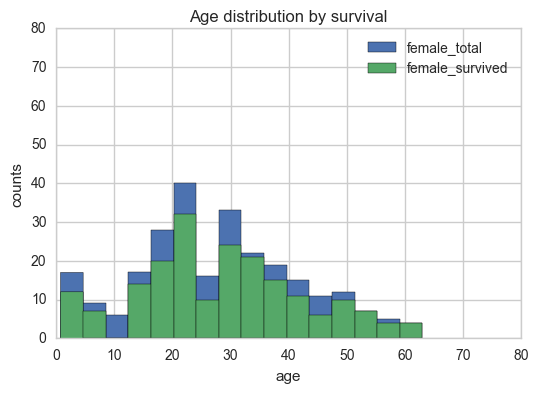

In [23]:
plt.figure()  
plt.axis([0, 80, 0, 80])  
plt.hist(female_total['Age'],bins=16, label='female_total')
plt.hist(female_survived['Age'],bins=16, label='female_survived')
#plt.hist(male_total['Age'],bins=16, label='male_total')
#plt.hist(male_survived['Age'],bins=16, label='male_survived')


plt.title('Age distribution by survival')  
plt.xlabel('age')  
plt.ylabel('counts')  
plt.legend() 

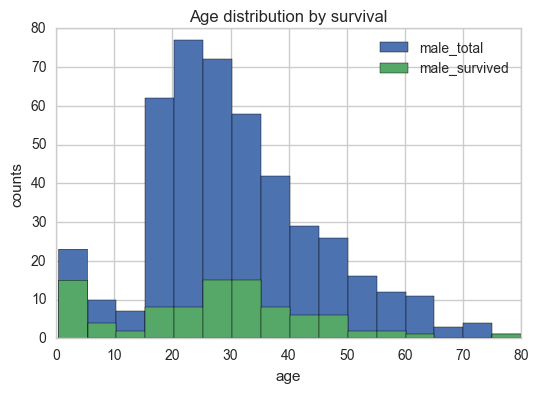

In [24]:
plt.figure()  
plt.axis([0, 80, 0, 80])  
#plt.hist(female_survived['Age'],bins=16, label='female_survived')
plt.hist(male_total['Age'],bins=16, label='male_total')
plt.hist(male_survived['Age'],bins=16, label='male_survived')


plt.title('Age distribution by survival')  
plt.xlabel('age')  
plt.ylabel('counts')  
plt.legend() 

## Family

When I took a glance at the dataset, I have no idea whether singlets and people with family members were treated differently during rescue action. 
Through a stright visualization, seems like singlets and people with large family size(>=4 members) were less likely survived.

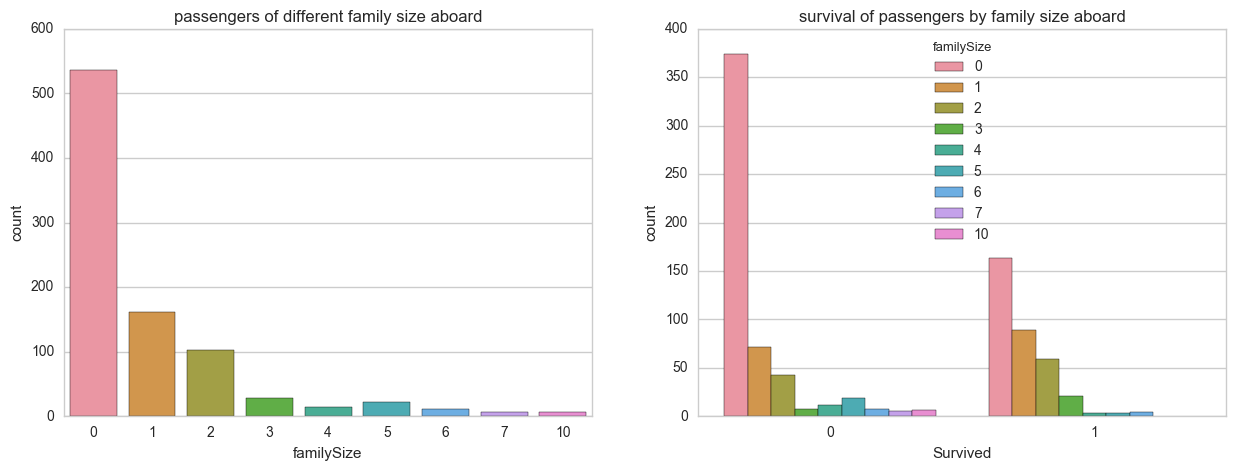

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

ax6=sns.countplot(x='familySize', data=full_variables,ax=axis1)
ax6.title.set_text('passengers of different family size aboard')
ax7=sns.countplot(x='Survived', hue="familySize", data=full_variables,ax=axis2)
ax7.title.set_text('survival of passengers by family size aboard')

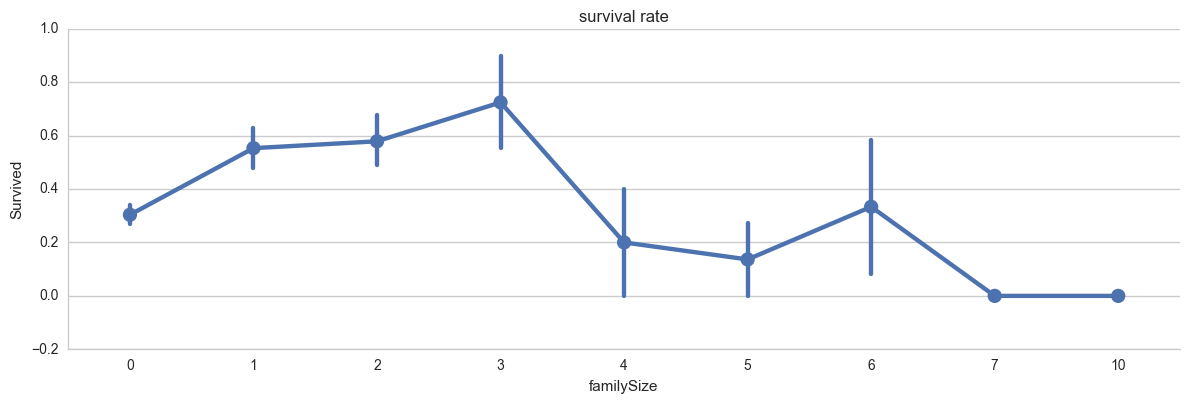

In [26]:
sns.factorplot('familySize','Survived', data=full_variables,size=4,aspect=3)
sns.plt.title('survival rate')

When the dataset is break down to 10 catergories based on family size, the data sizes are dramaticly reduced, what I just observed may not make sense, so I decided to devide the the dataset into just two group: with/without family, to increase statistic power. 


In [27]:

is_single=full_variables[full_variables['familySize'] == 0]
with_family=full_variables[full_variables['familySize'] >0]



Again use chi-square to test the dependency of 'Survive' on family status:

Ho: The survive rate is independent of family status.
Ha: The survive rate is associated with family status.

set a=0.05, as shown in the following cell, chi2=36.0005144677, p=1.97265438465e-09

p<a, deny Ho, accept Ha, The survive rate is associated with family status.




In [28]:
a=is_single[is_single['Survived']==0].shape[0]
b=is_single[is_single['Survived']==1].shape[0]
c=with_family[with_family['Survived']==0].shape[0]
d=with_family[with_family['Survived']==1].shape[0]
obs=np.array([[a,b], [c,d]])


chi2, p, dof, expected = chi2_contingency(obs)
print chi2,p

36.0005144677 1.97265438465e-09


# conclusion and discussion


Through my analysis, I am able to answer the questions I posted at the begining:

    Firstly, the analysis suggests that survival rates are significantly different among social classes, and they are negatively correlated, though it didn't achieve statistical significance, which in my opinion is due to small sample size. 
    Secondly, age is less likely affects survive for women. 
    Additionaly, singlets may have less motivation for survive compare to those who with family.

Beside that, My investigation of Titanic data set through visulization and statistics lead me to infer that after the sink of Titanic, the people on those life boats are more likely to be:
    1. upper class person
    2. women and 0-10 aged children 

Importantly, not only this investigation is limited by data size and missing values, but also some data are pretty objective, such as Pclass values, there is no detailed description shows how a passenger's social class were estimated，some accuracy issues may associate with this dataset.
On the other hand, those results are only statistical implications, not necessarily represent causal effect relationship.  




There are still a lot of other interesting points left, such as the survive chance by gender and class, it is possible that upper class men are less willing to sacrifice themselves(according to the movie). 

Additionally, the dismissed variables may contain interesting sights. For example, what is the embark location means to class and survive? How much different people paid for this journey and how that is related to survive?

# reference

1. https://www.kaggle.com/c/titanic
2. http://stackoverflow.com
3. http://scipy.org/docs.html
4. http://pandas.pydata.org/pandas-docs/stable/10min.html
5. http://pandas.pydata.org/pandas-docs/stable/groupby.html
6. http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
7. http://pbpython.com/pandas-pivot-table-explained.html